# 資料準備

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn import datasets
from sklearn import preprocessing
np.random.seed(10)

Using TensorFlow backend.


In [2]:
iris=datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_data=iris['data']

In [6]:
iris_target=iris['target']

In [7]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
import pandas as pd

In [9]:
x=pd.DataFrame(iris_data,columns=iris['feature_names'])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 資料預處理

In [10]:
from sklearn.model_selection import train_test_split #隨機劃分訓練集和測試集資料
x=iris_data
y=iris_target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
# 轉換為獨熱碼
from keras.utils import np_utils
y_Train_OneHot = np_utils.to_categorical(y_train)
y_Test_OneHot = np_utils.to_categorical(y_test)

x_train.shape
y_train.shape

(120,)

# 建立模型

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model=Sequential()

In [14]:
# 建立第一隱藏層
model.add(Dense(units=64,
                input_dim=4,
                kernel_initializer='normal',
                activation='relu'))

In [15]:
# 建立第二隱藏層
model.add(Dense(units=64,
                input_dim=4,
                kernel_initializer='normal',
                activation='relu'))

In [16]:
# 建立輸出層
model.add(Dense(units=3,
                kernel_initializer='normal',
                activation='softmax'))

In [17]:
# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
# 開始訓練
train_history=model.fit(x=x_train,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=12,batch_size=20,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 96 samples, validate on 24 samples
Epoch 1/12





 - 0s - loss: 1.0983 - acc: 0.5000 - val_loss: 1.0931 - val_acc: 0.5417
Epoch 2/12
 - 0s - loss: 1.0737 - acc: 0.4375 - val_loss: 1.0897 - val_acc: 0.2500
Epoch 3/12
 - 0s - loss: 1.0495 - acc: 0.3958 - val_loss: 1.0854 - val_acc: 0.2500
Epoch 4/12
 - 0s - loss: 1.0277 - acc: 0.3958 - val_loss: 1.0764 - val_acc: 0.2917
Epoch 5/12
 - 0s - loss: 0.9973 - acc: 0.4583 - val_loss: 1.0579 - val_acc: 0.5000
Epoch 6/12
 - 0s - loss: 0.9659 - acc: 0.6250 - val_loss: 1.0324 - val_acc: 0.5000
Epoch 7/12
 - 0s - loss: 0.9281 - acc: 0.6979 - val_loss: 1.0066 - val_acc: 0.5417
Epoch 8/12
 - 0s - loss: 0.8875 - acc: 0.7292 - val_loss: 0.9733 - val_acc: 0.5417
Epoch 9/12
 - 0s - loss: 0.8364 - acc: 0.7292 - val_loss: 0.9309 - val_acc: 0.5417
Epoch 10/12
 - 0s - loss: 0.7857 - acc: 0.7292 - val_loss: 0.8843 - val_acc: 0.5417
Epoch 11/12
 - 0s - los

# 使用圖形顯示訓練過程

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

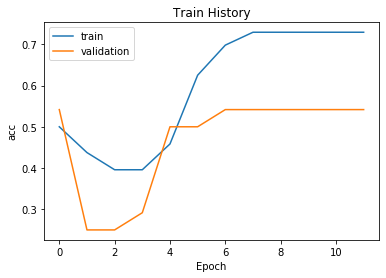

In [21]:
show_train_history(train_history,'acc','val_acc')

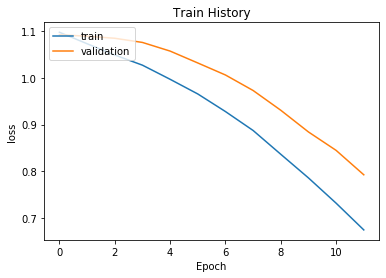

In [22]:
show_train_history(train_history,'loss','val_loss')

# 評估摩ㄒㄧ